In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import datetime
import urllib.request as req
from bs4 import BeautifulSoup

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [2]:
# JPXのETF一覧ページ
url = 'https://www.jpx.co.jp/equities/products/etfs/issues/01.html'

In [3]:
# 各商品の証券コードを取得
response = req.urlopen(url)
soup = BeautifulSoup(response, "html.parser")

attribute = []
div = soup.find('div', class_='component-normal-table')
table = div.find('table')
rows = table.find_all('tr')

tickers = []
for i, row in enumerate(rows):
    row_text = [td.get_text(strip=True) for td in row.select('th, td')]
    if i==0:
        continue
    tickers.append(row_text[1]+'.T')
print(len(tickers))


260


In [4]:
# 一年のうち取引が行われる日数
YEARLY_TRAIDING_DAYS = 252
# データ取得期間
START = pd.to_datetime('2013-01-01') 
END = pd.to_datetime('2022-12-31')

str_duration = START.strftime('%Y-%m-%d') + '_' + END.strftime('%Y-%m-%d')

f_tickers = 'data/tickers/' + str_duration + '_' +  'tickers.pickle'
f_returns = 'data/returns/' + str_duration + '_' +  'adj_close.csv'

In [5]:
tic = yf.Ticker('1305.T')
tic.info

{'phone': '+81-3-5555-3111',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 2356.5,
 'open': 2362.0,
 'dayLow': 2343.0,
 'dayHigh': 2370.0,
 'regularMarketPreviousClose': 2356.5,
 'regularMarketOpen': 2362.0,
 'regularMarketDayLow': 2343.0,
 'regularMarketDayHigh': 2370.0,
 'trailingPE': 13.776077,
 'volume': 382120,
 'regularMarketVolume': 382120,
 'averageVolume': 332731,
 'averageVolume10days': 455633,
 'averageDailyVolume10Day': 455633,
 'bid': 2345.0,
 'ask': 2346.0,
 'bidSize': 0,
 'askSize': 0,
 'yield': 0.0207,
 'totalAssets': 8231914045440,
 'fiftyTwoWeekLow': 1912.5,
 'fiftyTwoWeekHigh': 2484.5,
 'fiftyDayAverage': 2346.87,
 'twoHundredDayAverage': 2138.4424,
 'navPrice': 2412.9,
 'currency': 'JPY',
 'ytdReturn': 0.1788394,
 'beta3Year': 0.95,
 'fundFamily': 'Daiwa Asset Management Co Ltd',
 'fundInceptionDate': 994809600,
 'legalType': 'Exchange Traded Fund',
 'threeYearAverageReturn': 0.1449811,
 'fiveYearAverageReturn': 0.08245789,
 'exchange': 'JPX',
 'quoteType': '

In [6]:
def get_valid_tickers_info(tickers):
    if os.path.isfile(f_tickers):
        with open(f_tickers, 'rb') as f:
            valid_tickers_info = pickle.load(f)
    else:
        valid_tickers_info = {}
        # 各証券についてデータを取得
        for ticker in tickers:
            # 取得期間に証券データが存在しない場合はパスする
            try:
                tic = yf.Ticker(ticker)
                info = tic.info
                firstTradeDate_jst = datetime.datetime.fromtimestamp(tic.history_metadata['firstTradeDate'])
            except:
                continue
            # 取得開始の時期に証券が公開されていない場合はパスする
            if firstTradeDate_jst > START:
                continue
            else:
                valid_tickers_info[ticker] = info
        
        with open (f_tickers, 'wb') as f:
            pickle.dump(valid_tickers_info, f)
            
    return valid_tickers_info


valid_tickers_info = get_valid_tickers_info(tickers)
len(valid_tickers_info)

2526.T: Period '1wk' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']
1490.T: Period '1wk' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
1324.T: Period '1wk' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
2252.T: No data found, symbol may be delisted
2253.T: No data found, symbol may be delisted
2254.T: No data found, symbol may be delisted


91

In [7]:
valid_tickers_info

{'1305.T': {'phone': '+81-3-5555-3111',
  'maxAge': 86400,
  'priceHint': 2,
  'previousClose': 2356.5,
  'open': 2362.0,
  'dayLow': 2343.0,
  'dayHigh': 2370.0,
  'regularMarketPreviousClose': 2356.5,
  'regularMarketOpen': 2362.0,
  'regularMarketDayLow': 2343.0,
  'regularMarketDayHigh': 2370.0,
  'trailingPE': 13.776077,
  'volume': 382120,
  'regularMarketVolume': 382120,
  'averageVolume': 332731,
  'averageVolume10days': 455633,
  'averageDailyVolume10Day': 455633,
  'bid': 2345.0,
  'ask': 2346.0,
  'bidSize': 0,
  'askSize': 0,
  'yield': 0.0207,
  'totalAssets': 8231914045440,
  'fiftyTwoWeekLow': 1912.5,
  'fiftyTwoWeekHigh': 2484.5,
  'fiftyDayAverage': 2346.87,
  'twoHundredDayAverage': 2138.4424,
  'navPrice': 2412.9,
  'currency': 'JPY',
  'ytdReturn': 0.1788394,
  'beta3Year': 0.95,
  'fundFamily': 'Daiwa Asset Management Co Ltd',
  'fundInceptionDate': 994809600,
  'legalType': 'Exchange Traded Fund',
  'threeYearAverageReturn': 0.1449811,
  'fiveYearAverageReturn': 0

In [8]:
valid_tickers = list(valid_tickers_info.keys())

In [9]:
# 終値のみを取得
def get_adjclose(tickers):
    if os.path.isfile(f_returns):
        data = pd.read_csv(f_returns, index_col=0)
        data = data.astype(float)
    else:
        data =  pdr.get_data_yahoo(tickers, start=START, end=END)['Adj Close']
        data.to_csv(f_returns)
    return data

# 各商品の１日あたりの対数収益率を計算、対数を取るのは収益率を正規分布に落とし込むため
def calc_D_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

    # N = data.shape[0]
    # list_rate_of_return_per_term = list()
    # for j in range(N - D + 1):
    #     start = j
    #     end = j + D - 1
    #     rate_of_return = np.divide(
    #         data[end] - data[start], data[start]
    #     )
    #     list_rate_of_return_per_term.append(rate_of_return)
    # print()
    # return list_rate_of_return_per_term



data_adjclose = get_adjclose(valid_tickers)
returns = calc_D_returns(data_adjclose)

data_adjclose.to_csv(f_returns)

[*********************100%***********************]  91 of 91 completed


<Axes: xlabel='Date'>

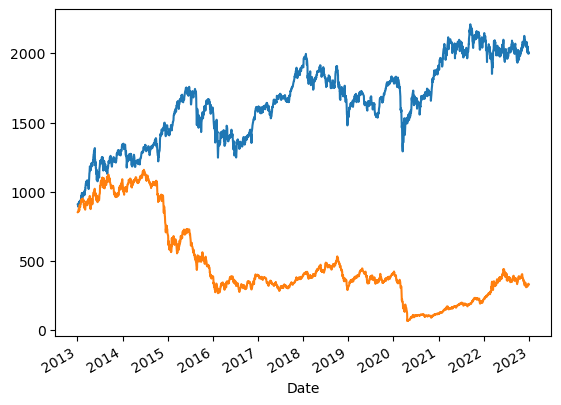

In [10]:
data_adjclose['1305.T'].plot()
data_adjclose['1699.T'].plot()

<Axes: xlabel='Date'>

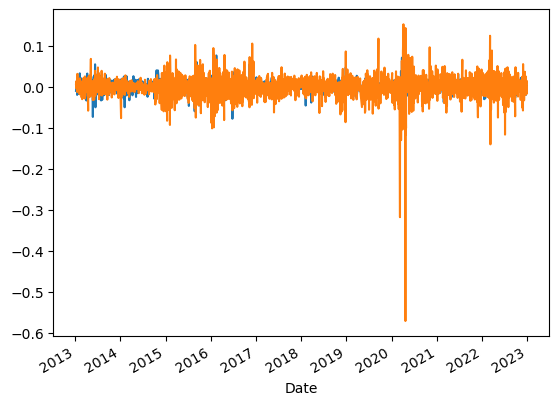

In [11]:
returns['1305.T'].plot()
returns['1699.T'].plot()

In [12]:
returns

,1305.T,1306.T,1308.T,1309.T,1311.T,1319.T,1320.T,1321.T,1322.T,1324.T,...,1690.T,1691.T,1692.T,1693.T,1694.T,1695.T,1696.T,1697.T,1698.T,1699.T
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,-0.009972,-0.006659,-0.006734,0.000000,-0.006257,0.012987,-0.007387,-0.006455,0.000000,0.031010,...,4.466206,0.005379,0.001068,0.000000,-0.008710,0.000000,0.000000,-0.012707,-0.004053,0.004684
2013-01-08,-0.007826,-0.012325,-0.011325,-0.014771,-0.006296,-0.006473,-0.012121,-0.013036,-0.006431,-0.007663,...,-0.001953,0.006921,0.000703,-4.488901,0.006640,-0.012821,-0.010152,-4.473545,-0.005089,0.000000
2013-01-09,0.006711,0.010095,0.009070,-0.001489,0.008386,0.006473,0.006545,0.008399,0.001612,0.000000,...,-0.013780,-0.004654,0.004160,4.472831,0.012866,-4.474153,0.000000,4.465843,0.004073,-0.003511
2013-01-10,0.012189,0.009995,0.010107,0.003471,0.014508,-0.032790,0.010199,0.007407,0.000000,0.007663,...,0.018169,0.004552,0.018524,-4.462906,-0.008414,4.493323,0.020203,0.000000,0.005068,0.013970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.002995,0.001768,0.003573,-0.002107,-0.002705,0.005134,0.003869,0.005883,-0.000685,0.000000,...,-0.004650,0.045133,-0.018205,0.007459,-0.006424,-0.002004,0.002876,-0.010926,0.003162,0.015305
2022-12-27,0.003483,0.005536,0.003307,0.015180,0.005402,0.008996,0.002571,0.002197,0.022619,0.000000,...,0.035792,0.008887,-0.007235,0.020063,0.023537,0.012955,0.004584,0.010421,0.002668,0.014475
2022-12-28,-0.001242,-0.002010,-0.000762,0.008020,-0.005294,-0.008996,-0.004780,-0.005319,0.004943,0.000000,...,0.003673,-0.014631,0.021092,0.004844,0.002733,0.011811,0.022054,0.035518,0.000242,0.001795


In [13]:
# 年次リターン
annual_returns = returns.mean()*YEARLY_TRAIDING_DAYS
# 各銘柄の共分散
cov_returns = returns.cov()*YEARLY_TRAIDING_DAYS

In [14]:
returns.mean()

1305.T    0.000323
1306.T    0.000319
1308.T    0.000319
1309.T    0.000258
1311.T    0.000262
            ...   
1695.T    0.001710
1696.T   -0.000039
1697.T   -0.001595
1698.T    0.000296
1699.T   -0.000381
Length: 91, dtype: float64

In [15]:
pd.set_option('display.max_rows', 100)
print(annual_returns)

1305.T    0.081347
1306.T    0.080430
1308.T    0.080390
1309.T    0.065074
1311.T    0.066140
1319.T    0.079293
1320.T    0.093392
1321.T    0.093771
1322.T    0.087588
1324.T   -0.036869
1325.T   -0.018631
1326.T    0.048120
1328.T    0.037461
1329.T    0.095609
1330.T    0.093569
1343.T    0.053447
1345.T    0.052173
1346.T    0.093746
1348.T    0.079921
1349.T    0.022796
1385.T    0.545624
1386.T    0.543988
1387.T    0.046899
1388.T   -0.438264
1389.T    1.084269
1390.T    0.497628
1393.T    1.588566
1394.T   -0.409277
1540.T    0.048104
1541.T   -0.004072
1542.T    0.011458
1543.T    0.135522
1545.T    0.185183
1546.T    0.137143
1547.T    0.139776
1550.T    0.114584
1551.T    0.108508
1552.T   -0.589419
1554.T    0.103698
1555.T    0.026642
1557.T    0.140614
1559.T    0.019691
1560.T   -0.016066
1563.T    0.091450
1566.T   -0.035584
1615.T    0.038433
1617.T    0.065002
1618.T    0.012934
1619.T    0.049086
1620.T    0.084842
1621.T    0.086721
1622.T    0.043553
1623.T    0.

In [16]:
cov_returns

,1305.T,1306.T,1308.T,1309.T,1311.T,1319.T,1320.T,1321.T,1322.T,1324.T,...,1690.T,1691.T,1692.T,1693.T,1694.T,1695.T,1696.T,1697.T,1698.T,1699.T
1305.T,0.037661,0.037255,0.036832,0.022341,0.033867,0.023982,0.038005,0.037790,0.020431,0.023298,...,0.092679,0.009358,0.012460,-0.112659,-0.045752,-0.078691,0.006768,0.134377,0.027282,0.028436
1306.T,0.037255,0.038098,0.037231,0.022540,0.034051,0.024647,0.038266,0.038206,0.020721,0.023037,...,0.136612,0.013635,0.000461,-0.116975,-0.053549,-0.114737,0.006548,0.118332,0.027524,0.028466
1308.T,0.036832,0.037231,0.037388,0.022192,0.033904,0.024088,0.037895,0.038146,0.020314,0.023365,...,0.120245,0.011249,0.002756,-0.114366,-0.076060,-0.087251,0.006867,0.107960,0.027536,0.028413
1309.T,0.022341,0.022540,0.022192,0.062968,0.021715,0.014101,0.025227,0.025322,0.043201,0.018797,...,0.168524,-0.055375,0.120604,-0.029655,-0.118506,-0.055616,0.006636,-0.129895,0.016950,0.024848
1311.T,0.033867,0.034051,0.033904,0.021715,0.037973,0.023374,0.035143,0.035227,0.018936,0.022229,...,0.101155,0.062918,0.019093,-0.042697,-0.073185,-0.168054,0.006584,0.095442,0.025504,0.028079
1319.T,0.023982,0.024647,0.024088,0.014101,0.023374,0.075453,0.023929,0.025125,0.013294,0.016026,...,0.210050,-0.121053,0.062856,-0.015619,0.018943,-0.199575,0.001523,0.147528,0.018950,0.020784
1320.T,0.038005,0.038266,0.037895,0.025227,0.035143,0.023929,0.044492,0.042270,0.022050,0.026369,...,0.137490,-0.002797,-0.007310,-0.058999,-0.102433,-0.081036,0.007278,0.201097,0.028529,0.031083
1321.T,0.037790,0.038206,0.038146,0.025322,0.035227,0.025125,0.042270,0.043223,0.022079,0.025049,...,0.153351,-0.020920,-0.013630,-0.070574,-0.133402,-0.082288,0.007010,0.178442,0.028326,0.030584
1322.T,0.020431,0.020721,0.020314,0.043201,0.018936,0.013294,0.022050,0.022079,0.219245,0.019071,...,0.149407,-0.101221,0.008085,-0.557805,-0.137356,-0.081183,0.006790,-0.181842,0.016160,0.021709
1324.T,0.023298,0.023037,0.023365,0.018797,0.022229,0.016026,0.026369,0.025049,0.019071,0.092446,...,0.045229,-0.021993,0.045020,0.084870,-0.150913,-0.067584,0.010400,0.085453,0.018931,0.042162


# 組合せ最適化

In [17]:
num_brand = len(valid_tickers)

## 最大投資口数 K
K = 100

## 共分散を考慮するパラメータ
gamma = 1

In [18]:
from amplify import BinarySymbolGenerator

# 変数の定義
x = BinarySymbolGenerator().array(num_brand, K)

# Unary法による非負整数wのバイナリ変数xによる表現
w = x.sum(axis=1)

In [19]:
from amplify import einsum


# 目的関数の定義
def setObjective(w, num_brand, expected_rate_of_return, variance_rate_of_return, gamma):
    """目的関数を定義
    ----------
    w: BinaryPolyArray
        各銘柄の購入口数を表す非負変数

    num_brand: int
        ポートフォリオを組む銘柄数

    expected_rate_of_return: np.ndarray
        期待収益率

    variance_rate_of_return: np.ndarray
        リスク分散

    gamma: float
        期待リスクの重要度を表すパラメータ

    Notes
    -----
    期待収益率の最大化と期待リスクの最小化
    期待収益率: E_w(R)
    期待リスク: V_w(R)
    目的関数 =  E_w(R) - gamma / 2 * V_w(R)
    """

    # 期待収益率の定義
    profit = einsum("i,i->", w, expected_rate_of_return)

    # 分散の定義
    risk = einsum("i,j,ij->", w, w, variance_rate_of_return)

    # 目的関数の定義
    objective = -profit + gamma * 0.5 * risk

    return objective, profit, risk

In [20]:
# 制約条件の定義
from amplify.constraint import equal_to


def setConstraint(w, K, num_brand):
    """制約式を定義

    Parameters
    ----------
    w: BinaryPoly
        各銘柄の購入口数を表す非負変数

    K: int
        全投資資産口数

    num_brand: int
        ポートフォリオを組む銘柄数

    Notes
    -----
    全投資資産はK口だけ
        \sum_{i=1}^n w_i = K
    """
    constraint = equal_to(w, K)

    return constraint

In [21]:
# ===================
# 目的関数と制約式の構築
# ===================
objective, _, _ = setObjective(
    w, num_brand, annual_returns.values, cov_returns.values, gamma
)
constraint = setConstraint(w, K, num_brand)

# 制約式の強さを表す係数
priority = 0.05

model = objective + priority * constraint

In [22]:
from amplify import Solver
from amplify.client import GurobiClient

client = GurobiClient()
# client.token = "DdYQS9jhLTCVAFJp4mQoCeHnwAKNeR3L" 
client.gurobi_path = "/Library/gurobi1001/macos_universal2/lib/libgurobi100.dylib"
client.parameters.time_limit = 10

# ソルバーを定義して実行
solver = Solver(client)
result = solver.solve(model)
if len(result) == 0:
    raise RuntimeError("Any one of constraints is not satisfied.")

# result配列にエネルギー値の昇順で解が格納される。よってresult[0]が最良の解。
energy, values = result[0].energy, result[0].values

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-29
Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-29


In [23]:
def showSortedDataFrame(names, w_values, return_rates=None):
    """
    Parameters
    ----------
    names: list
        銘柄の名前

    return_rates: np.ndarray
        各銘柄の期待収益率

    w_values: BinaryPolyArray
        各銘柄の投資口数

    """
    if return_rates is None:
        df = pd.DataFrame(dict(brand_name=names, count=w_values.tolist()))
    else:
        df = pd.DataFrame(
            dict(brand_name=names, return_rate=return_rates, count=w_values.tolist())
        )

    # 投資口数が多い順にソート
    sorted_df = df.sort_values("count", ascending=False)

    # 表示する際には投資口数0の銘柄を表示しない
    display_df = sorted_df.query("count > 0")
    display(display_df.reset_index(drop=True))
    return display_df

In [24]:
# 各銘柄の投資口数が解である.
w_values = w.decode(result[0].values).astype(int)

# 投資口数の多い順に出力する
showSortedDataFrame(
    names=valid_tickers, return_rates=annual_returns.values*100, w_values=w_values
)

,brand_name,return_rate,count
0,1305.T,8.134709,100


,brand_name,return_rate,count
0,1305.T,8.134709,100


In [25]:
8.8/14.7

0.598639455782313

In [26]:
pr/risk

NameError: name 'pr' is not defined